In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats


In [4]:
#clean and prepare data 
df = pd.read_csv('data/image_lst.csv')
df2 = pd.read_csv('data/results.csv')
df3 = pd.read_csv('data/fisheye_results.csv')

df = pd.merge(df, df2, on = 'id', how = 'left')
df = pd.merge(df, df3, on = 'id', how = 'left')


df = df.drop(['water_x', 'mvt_id','class', 'network', 'name', 'ref', 'ref_length', 'distance', 'angle', 'road', 'Trees', 'sky_x', 'buildings','people', 'bikes', 'cars', 'pavement', 'river'], axis = 1)
df = df.dropna(subset = ['building'])
df['lst1;'] = df['lst1;'].str.rstrip(';')
df.rename(columns= {'lst1;': 'lst'}, inplace= True)
df['lst'] = pd.to_numeric(df['lst'], errors='coerce')
df = df.dropna(subset = ['lst'])
df = df.drop(df[df.building_view >1].index)
#check df dimensions and structure
df.shape
df.head()


/tmp/ipykernel_14517/3136752008.py:2: DtypeWarning: Columns (0,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/image_lst.csv')
/tmp/ipykernel_14517/3136752008.py:6: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = pd.merge(df, df2, on = 'id', how = 'left')
/tmp/ipykernel_14517/3136752008.py:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = pd.merge(df, df3, on = 'id', how = 'left')


,id,UHI1,lst,building,trees,sky_y,water_y,impervious,pervious,building_view,trees_view,sky_view
1,2.0,0.629178,25.730860,0.010498,0.188775,0.426315,0.002293,0.116882,0.022847,0.014810,0.179253,0.755577
19,20.0,1.199048,29.978317,0.035234,0.003706,0.473510,0.000000,0.241210,0.000112,0.088769,0.004842,0.901363
20,21.0,1.137323,30.109344,0.037347,0.004158,0.473990,0.000000,0.241008,0.007819,0.085310,0.004091,0.904634
21,22.0,1.103732,30.211889,0.025379,0.004532,0.477384,0.000000,0.251289,0.012693,0.070006,0.006337,0.914810
22,23.0,1.119685,30.231253,0.027018,0.007489,0.462693,0.000000,0.258467,0.014020,0.062632,0.008272,0.880624


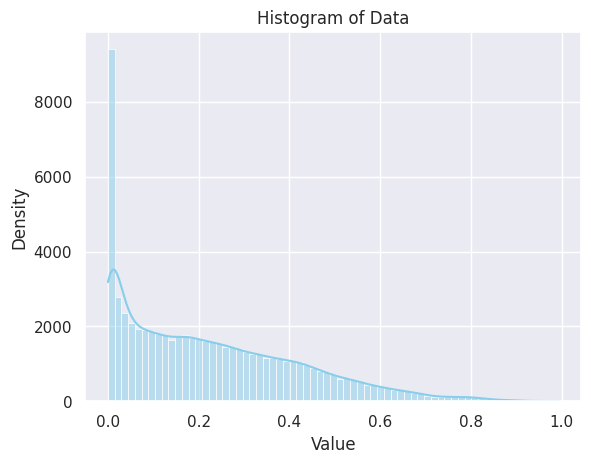

In [9]:
# Create a histogram using Seaborn
sns.histplot(df['building_view'], kde=True, color='skyblue')
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

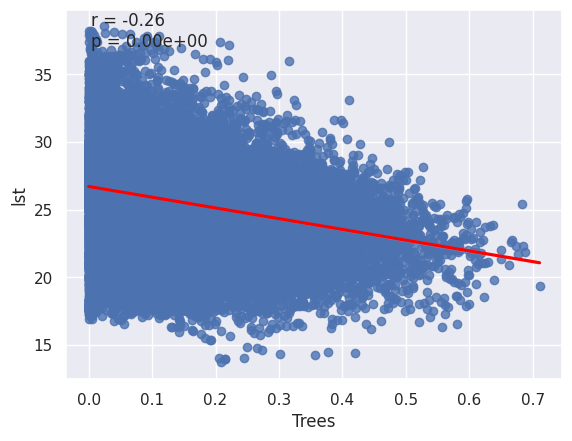

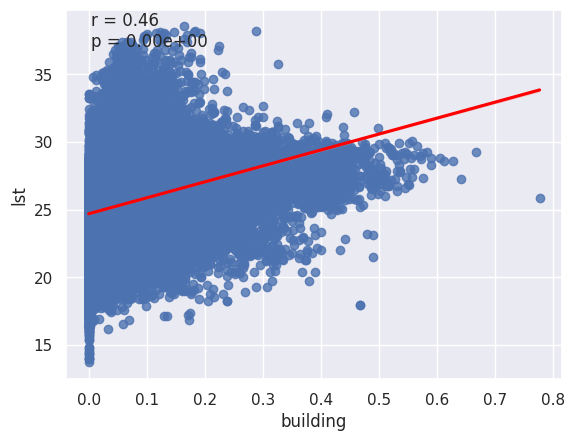

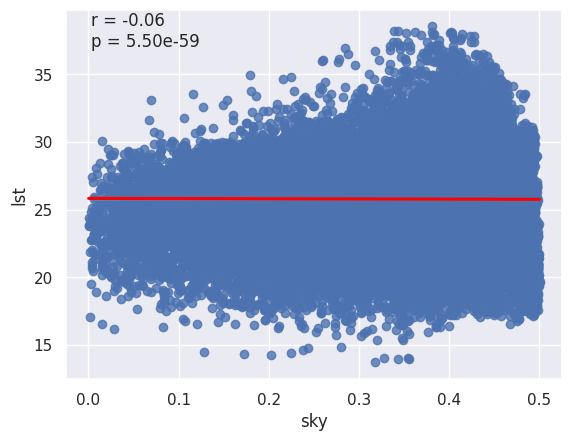

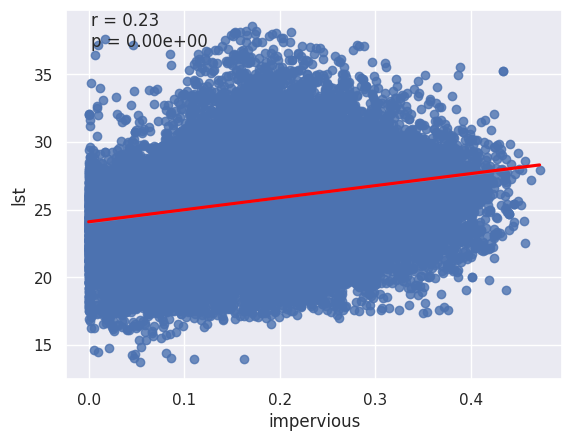

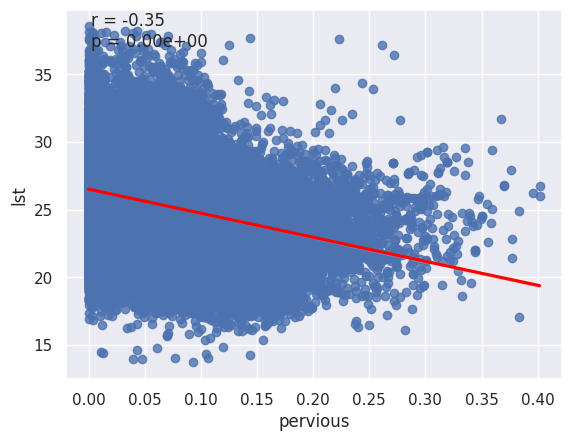

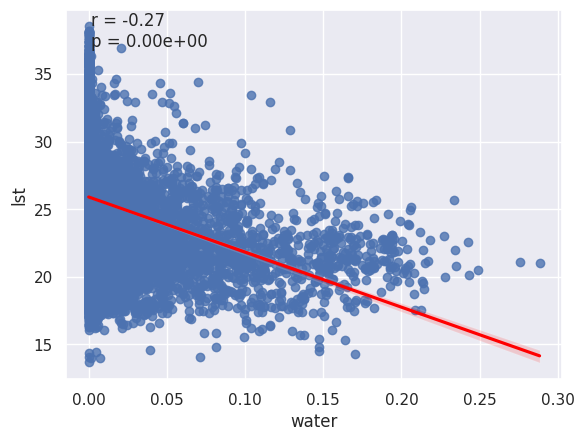

In [25]:
#sample_size = 1000 

#df_subset = df.sample(n= sample_size, random_state = 42)

sns.set()
#plot treeview 
sns.regplot(y= df['lst'], x = df['trees'], line_kws={'color':'red'})
plt.xlabel('Trees')
plt.ylabel('lst')
r, p = stats.spearmanr(df['trees'], df['lst'])
plt.text(0.05, 0.9, f'r = {r:.2f}\np = {p:.2e}', transform = plt.gca().transAxes)
plt.show()

# plot building view
sns.regplot(y= df['lst'], x = df['building'], line_kws={'color':'red'})
plt.xlabel('building')
plt.ylabel('lst')
r, p = stats.spearmanr(df['building'], df['lst'])
plt.text(0.05, 0.9, f'r = {r:.2f}\np = {p:.2e}', transform = plt.gca().transAxes)
plt.show()

# plot skyview
sns.regplot(y= df['lst'], x = df['sky_y'], line_kws={'color':'red'})
plt.xlabel('sky')
plt.ylabel('lst')
r, p = stats.spearmanr(df['sky_view'], df['lst'])
plt.text(0.05, 0.9, f'r = {r:.2f}\np = {p:.2e}', transform = plt.gca().transAxes)
plt.show()


# plot skyview
sns.regplot(y= df['lst'], x = df['impervious'], line_kws={'color':'red'})
plt.xlabel('impervious')
plt.ylabel('lst')
r, p = stats.spearmanr(df['impervious'], df['lst'])
plt.text(0.05, 0.9, f'r = {r:.2f}\np = {p:.2e}', transform = plt.gca().transAxes)
plt.show()


# plot skyview
sns.regplot(y= df['lst'], x = df['pervious'], line_kws={'color':'red'})
plt.xlabel('pervious')
plt.ylabel('lst')
r, p = stats.spearmanr(df['pervious'], df['lst'])
plt.text(0.05, 0.9, f'r = {r:.2f}\np = {p:.2e}', transform = plt.gca().transAxes)
plt.show()


# plot skyview
sns.regplot(y= df['lst'], x = df['water_y'], line_kws={'color':'red'})
plt.xlabel('water')
plt.ylabel('lst')
r, p = stats.spearmanr(df['water_y'], df['lst'])
plt.text(0.05, 0.9, f'r = {r:.2f}\np = {p:.2e}', transform = plt.gca().transAxes)
plt.show() 

Index(['id', 'UHI1', 'lst', 'building', 'trees', 'sky_y', 'water_y',
       'impervious', 'pervious', 'building_view', 'trees_view', 'sky_view',
       'quantile_category'],
      dtype='object')


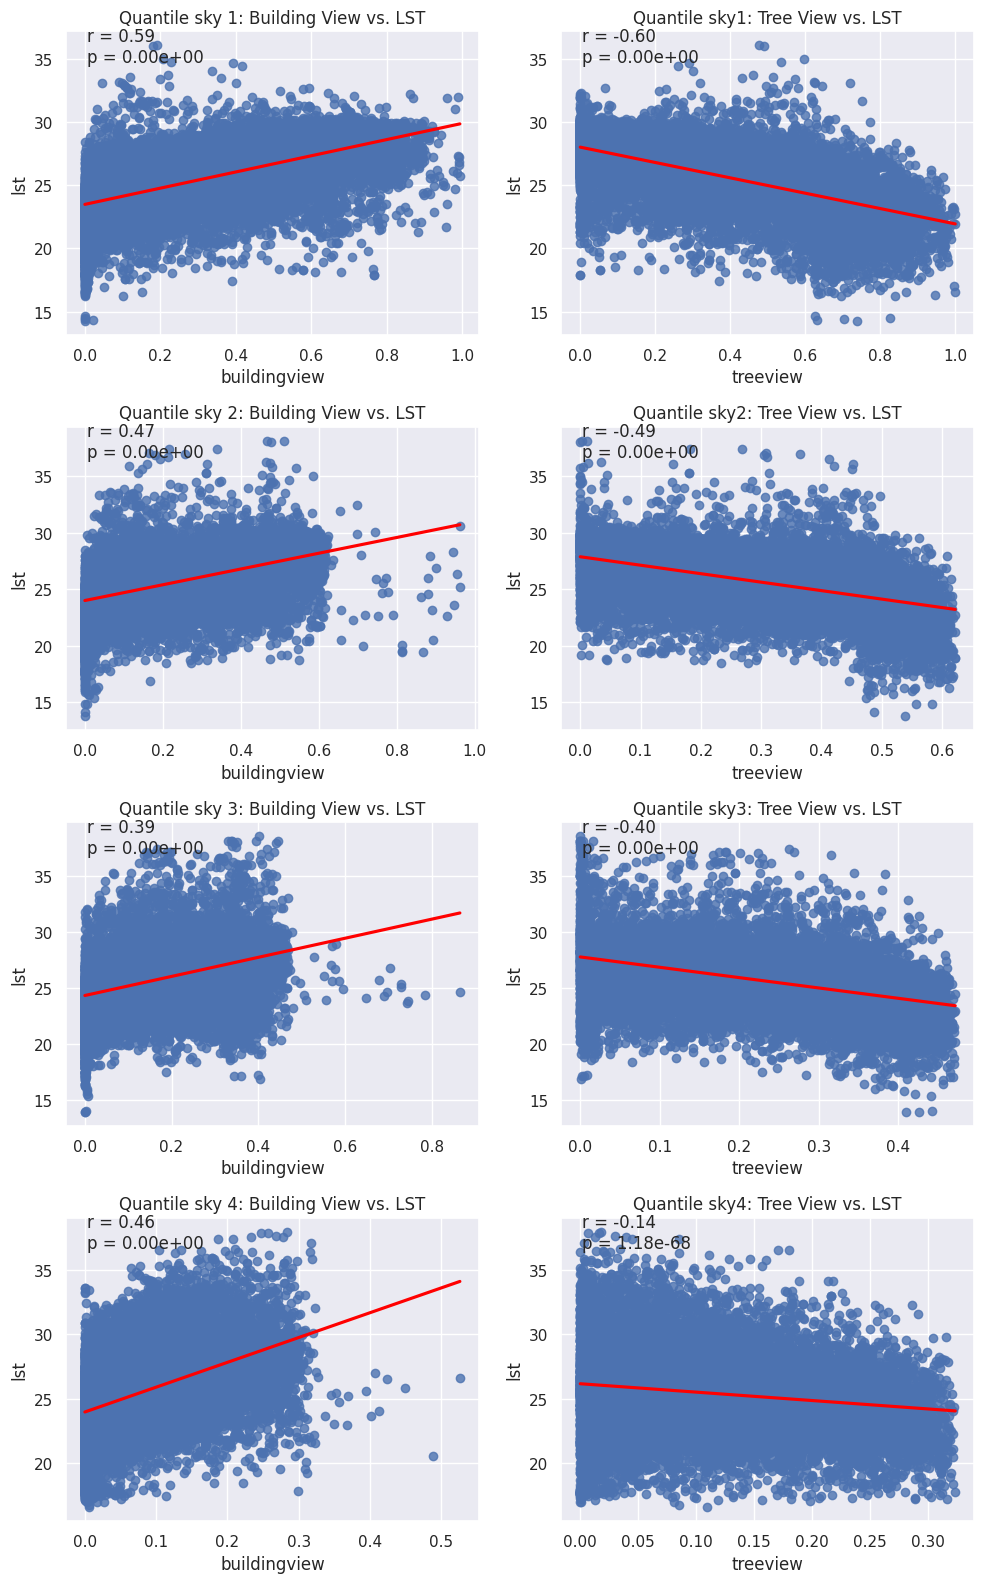

In [5]:
import scipy.stats as stats
column_name = 'sky_view'

# Calculate the quantiles and assign labels to each quantile
quantile_labels = ['Q1', 'Q2', 'Q3', 'Q4']
df['quantile_category'] = pd.qcut(df[column_name], q=4, labels=quantile_labels)

# Subset the dataset based on quantile category
subset_q1 = df[df['quantile_category'] == 'Q1']
subset_q2 = df[df['quantile_category'] == 'Q2']
subset_q3 = df[df['quantile_category'] == 'Q3']
subset_q4 = df[df['quantile_category'] == 'Q4']

print(df.columns)
sns.set()

# Create a single figure and axes for all the plots
fig, axes = plt.subplots(4, 2, figsize=(10, 16))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, subset in enumerate([subset_q1, subset_q2, subset_q3, subset_q4]):
    # Plot building view against lst with constant skyview
    ax = axes[i*2]
    sns.regplot(x='building_view', y='lst', data=subset, ax=ax, ci=None, line_kws = {'color':'red'})
    ax.set_xlabel('buildingview')
    ax.set_ylabel('lst')
    ax.set_title(f'Quantile sky {i+1}: Building View vs. LST')
    
    # Calculate and display correlation coefficient (r) and p-value
    r, p = stats.pearsonr(subset['building_view'], subset['lst'])
    ax.annotate(f'r = {r:.2f}\np = {p:.2e}', xy=(0.05, 0.9), xycoords='axes fraction')

    # Plot treeview against lst with constant skyview
    ax = axes[i*2+1]
    sns.regplot(x='trees_view', y='lst', data=subset, ax=ax, ci=None, line_kws = {'color':'red'})
    ax.set_xlabel('treeview')
    ax.set_ylabel('lst')
    ax.set_title(f'Quantile sky{i+1}: Tree View vs. LST')

    # Calculate and display correlation coefficient (r) and p-value
    r, p = stats.spearmanr(subset['trees_view'], subset['lst'])
    ax.annotate(f'r = {r:.2f}\np = {p:.2e}', xy=(0.05, 0.9), xycoords='axes fraction')


plt.tight_layout()
plt.show()

In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

print(df.head())
X = df.drop(['lst',
             'UHI1',
             'quantile_category',
             'id'
              ], axis = 1)
y = df['lst']

def lasso_tune(X, y):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    Lasso_params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
    
    grid_search = GridSearchCV(Lasso(), Lasso_params, refit=True, scoring='neg_root_mean_squared_error', cv = 5).fit(X_train, y_train)

    # Print the best parameters found by GridSearchCV
    print('Best parameters:', grid_search.best_params_)

    # Evaluate the performance of the best Lasso model and print coefficients
    best_Lasso = grid_search.best_estimator_
    y_pred = best_Lasso.predict(X_test)
    coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': best_Lasso.coef_})
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Test MSE:', mse, 'r2:', r2, 'coefficients:', coefficients_df)

    return best_Lasso

lasso_tune(X,y)

      id      UHI1        lst  building     trees     sky_y   water_y  \
1    2.0  0.629178  25.730860  0.010498  0.188775  0.426315  0.002293   
19  20.0  1.199048  29.978317  0.035234  0.003706  0.473510  0.000000   
20  21.0  1.137323  30.109344  0.037347  0.004158  0.473990  0.000000   
21  22.0  1.103732  30.211889  0.025379  0.004532  0.477384  0.000000   
22  23.0  1.119685  30.231253  0.027018  0.007489  0.462693  0.000000   

    impervious  pervious  building_view  trees_view  sky_view  \
1     0.116882  0.022847       0.014810    0.179253  0.755577   
19    0.241210  0.000112       0.088769    0.004842  0.901363   
20    0.241008  0.007819       0.085310    0.004091  0.904634   
21    0.251289  0.012693       0.070006    0.006337  0.914810   
22    0.258467  0.014020       0.062632    0.008272  0.880624   

   quantile_category  
1                 Q4  
19                Q4  
20                Q4  
21                Q4  
22                Q4  
Best parameters: {'alpha': 0.001

Lasso(alpha=0.001)

In [9]:
from sklearn.ensemble import RandomForestRegressor


def rf_tune(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # rf_params = {'n_estimators':[100, 1000]}
    rf_params = {'n_estimators':[200, 500, 1000],
                  'max_features':['sqrt','log2'],
                  'min_samples_split':[2, 4, 8],
                  'min_samples_leaf':[0.001, 0.01, 0.1],
                  'n_jobs': [-1]}
    grid_search = GridSearchCV(RandomForestRegressor(), rf_params, scoring='neg_root_mean_squared_error').fit(X_train, y_train)

    # Print the best parameters found by GridSearchCV
    print('Best parameters:', grid_search.best_params_)

    # Evaluate the performance of the best rf model on the test data
    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Test MSE:', mse, 'r2:', r2)


    return best_rf

rf_tune(X, y)

Best parameters: {'max_features': 'log2', 'min_samples_leaf': 0.001, 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1}
Test MSE: 4.814684858343318 r2: 0.3952679931721701


RandomForestRegressor(max_features='log2', min_samples_leaf=0.001,
                      n_estimators=1000, n_jobs=-1)

In [18]:
from lightgbm import LGBMRegressor

def gbt_tune(X, y):
    
    #Train test split data 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # gbt_params = {'booster': ['gbtree'],
    #                'objective': ['reg:squarederror'],
    #                'eta': [0.001, 0.003]}
    gbt_params = {'learning_rate': [0.0001, 0.001, 0.01, 0.05, 0.1],
                   'num_leaves': [10, 20, 30, 50, 100],
                   'max_depth':[3, 5, 7, 9, 15],
                   'max_bin':[10, 20, 40, 60, 80],
                   'min_data_in_leaf':[50, 100, 200, 300, 500],
                   'reg_alpha':[0.1, 0.3, 0.7],
                   'reg_lambda':[0.1, 0.3, 0.7], 
                   'n_jobs' : [-1]}   
    grid_search = RandomizedSearchCV(LGBMRegressor(), gbt_params, refit=True, scoring='neg_root_mean_squared_error', cv = 10).fit(X_train, y_train)

    
    print('Best parameters:', grid_search.best_params_)

    # Evaluate the performance of the best MLP model on the test data
    best_gbt = grid_search.best_estimator_
    y_pred = best_gbt.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Test MSE:', mse, 'r2:', r2)

    return best_gbt

gbt_tune(X, y)

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGB

LGBMRegressor(max_bin=20, max_depth=15, min_data_in_leaf=300, num_leaves=100,
              reg_alpha=0.3, reg_lambda=0.1)

In [10]:
from sklearn.svm import SVR

def svr_tune(X, y):
    # svr_params = {'C':[1, 10]}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    svr_params = {'C':[1, 10, 100, 1000],
                  'gamma':[0.5, 0.1, 0.01, 0.001],
                  'epsilon':[0.1, 0.2, 0.3, 0.5],
                  'kernel':['rbf','poly','sigmoid']
                  }
    
    grid_search = RandomizedSearchCV(SVR(), svr_params, refit=True, scoring='neg_root_mean_squared_error').fit(X_train, y_train)

    # Print the best parameters found by GridSearchCV
    print('Best parameters:', grid_search.best_params_)

       # Evaluate the performance of the best MLP model on the test data
    best_svr = grid_search.best_estimator_
    y_pred = best_svr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Test MSE:', mse, 'r2:', r2)

    return best_svr

svr_tune(X,y)

Best parameters: {'kernel': 'poly', 'gamma': 0.5, 'epsilon': 0.2, 'C': 1000}
Test MSE: 5.768568555278254 r2: 0.2754586973823935


SVR(C=1000, epsilon=0.2, gamma=0.5, kernel='poly')

In [28]:
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Assuming X and y are your existing dataset
# Transform the data to include another axis if needed
#X = X[:, np.newaxis]

# Polynomial feature transformation
poly = PolynomialFeatures(degree= 3)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the polynomial features to the linear regression model
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Sort the values for better plotting
#sorted_zip = sorted(zip(X, y_pred), key=lambda x: x[0])
#X, y_pred = zip(*sorted_zip)

# Plot the data and the fitted polynomial
#plt.scatter(X, y, s=10)
##plt.plot(X, y_pred, color='m')
#plt.show()

# Print the mean squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2:{r2}")

Mean Squared Error: 5.232964690690273
R2:0.342731386961599


In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

if torch.cuda.is_available():
    print("CUDA is available.")
else:
    print("CUDA is not available.")


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.from_numpy(np.array(X_train).astype(np.float32))
X_test = torch.from_numpy(np.array(X_test).astype(np.float32))
y_train = torch.from_numpy(np.array(y_train).astype(np.float32))
y_test = torch.from_numpy(np.array(y_test).astype(np.float32))
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc3 = nn.Linear(input_size, hidden_size)
        self.fc4 = nn.Linear(input_size, hidden_size)
        
        self.relu = nn.GELU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define the model parameters
input_size = X.shape[1]
hidden_size = 10000
output_size = 1


# Initialize the model
model = MLP(input_size, hidden_size, output_size)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs.view(-1), y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predicted = model(X_test)
    test_loss = criterion(predicted.view(-1), y_test)
    print(f'Test loss: {test_loss.item():.4f}')

# Convert the predicted values and true values back to numpy arrays
y_predicted = predicted.detach().numpy()
y_true = y_test.numpy()


mse = mean_squared_error(y_true, y_predicted)
mae = mean_absolute_error(y_true, y_predicted)
print(f"Mean Squared Error: {mse}")
print(f"mae Score: {mae}")



CUDA is available.


/tmp/ipykernel_10936/1891361166.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train)
/tmp/ipykernel_10936/1891361166.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train)
/tmp/ipykernel_10936/1891361166.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test)
/tmp/ipykernel_10936/1891361166.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), 

Epoch [10/100], Loss: 37.4722
Epoch [20/100], Loss: 31.3230
Epoch [30/100], Loss: 8.9112
Epoch [40/100], Loss: 6.4467
Epoch [50/100], Loss: 7.0893
Epoch [60/100], Loss: 5.9255
Epoch [70/100], Loss: 5.9790
Epoch [80/100], Loss: 5.8457
Epoch [90/100], Loss: 5.8444
Epoch [100/100], Loss: 5.8119
Test loss: 6.0216
Mean Squared Error: 6.021570682525635
mae Score: 1.8599379062652588
